In [1]:
from kbmodpy import kbmod as kb
import numpy
import random as rd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [7]:
def add_trajectory(image_list, tr, psf):
    init_time = image_list[0].get_time()
    for i in image_list:
        t = i.get_time()-init_time
        #print('x: '+str(tr.x+tr.x_v*t) + ' y: ' + str(tr.y+tr.y_v*t) )
        i.add_object( tr.x+tr.x_v*t, tr.y+tr.y_v*t, tr.flux, psf )

In [8]:
def compare_trajectory(a, b, threshold):
    # compare flux too?
    return (a.x == b.x and a.y == b.y and 
    abs(a.x_v/b.x_v-1)<threshold and 
    abs(a.y_v/b.y_v-1)<threshold)

In [9]:
def match_trajectories(results_list, test_list, threshold):
    match_indices = []
    for r in range(len(results_list)):
        if any(compare_trajectory(results_list[r], test, threshold) for test in test_list):
            match_indices.append(r)
    return match_indices

In [2]:
path = '../../HITS/test_35/4,6tempExp/new_header/'

In [37]:
files = os.listdir(path)

In [38]:
files.sort()
files = [path+f for f in files]
files = files[:4]
files

['../../HITS/test_35/4,6tempExp/new_header/v410913-fg.fits',
 '../../HITS/test_35/4,6tempExp/new_header/v410969-fg.fits',
 '../../HITS/test_35/4,6tempExp/new_header/v411019-fg.fits',
 '../../HITS/test_35/4,6tempExp/new_header/v411053-fg.fits']

In [39]:
images = [kb.layered_image(f) for f in files]

In [40]:
p = kb.psf(1.5)

In [41]:
object_count = 100
x_range = (1900,3450)
y_range = (1100, 3450)
xv_range = (2200,2450)
yv_range = (800,1100)
flux_range = (2500, 4500)

In [42]:
results_key = []
for _ in range(object_count):
    traj = kb.trajectory()
    traj.x = int(rd.uniform(*x_range))
    traj.y = int(rd.uniform(*y_range))
    traj.x_v = rd.uniform(*xv_range)
    traj.y_v = rd.uniform(*yv_range)
    traj.flux = rd.uniform(*flux_range)
    results_key.append(traj)

In [43]:
results_key[0]

lh: 0.000000 flux: 4350.761230 x: 3030 y: 1646 x_v: 2403.073242 y_v: 1039.014282 obs_count: 0

In [44]:
for t in results_key:
    add_trajectory(images, t, p)

In [46]:
len(match_trajectories(results_key, results_key, 0.05))

100

In [47]:
stack = kb.image_stack(images)

In [48]:
flags = ~0 # mask pixels with any flags
flag_exceptions = [32,39] # unless it has one of these special combinations of flags
master_flags = int('100111', 2) # mask any pixels which have any of 
# these flags in more than two images

In [49]:
stack.apply_mask_flags(flags, flag_exceptions)

In [50]:
stack.apply_master_mask(master_flags, 2)

In [51]:
images = stack.get_images()

In [52]:
img = images[1] #kb.layered_image("test",4096, 4096, 20.0, 400.0, 0.0)#

In [53]:
sub = img.science()

In [54]:
sub = sub[2700:3600,2900:3800]

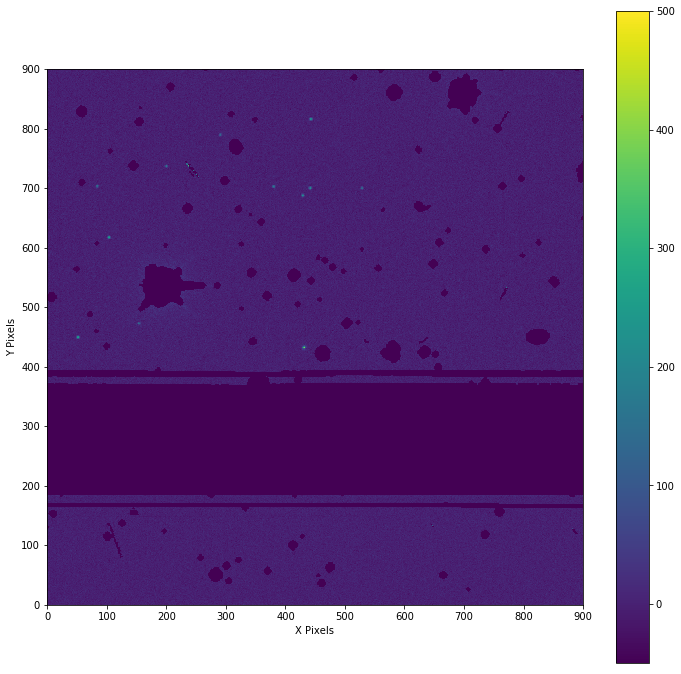

In [55]:
fig = plt.figure(figsize=(12,12))
plt.imshow(sub, origin='lower',  vmin=-50, vmax=500)#cmap=plt.cm.Greys_r,
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.colorbar()

In [56]:
search = kb.stack_search(stack, p)

In [57]:
search.gpu(50,50, 0.15, 0.9, 2300.0, 3200.0)

In [58]:
#search.filter_min_obs(3)

In [59]:
results = search.get_results(0, 100000)

In [60]:
results = [t for t in results if t.obs_count>2]

In [61]:
#search.save_results("filtered.txt", 0.01)

In [62]:
len(results)

18625

In [63]:
results

[lh: 197.291565 flux: 4147.245117 x: 3025 y: 2339 x_v: 2287.331787 y_v: 860.958252 obs_count: 4,
 lh: 187.302704 flux: 3891.700684 x: 2721 y: 2534 x_v: 2341.157227 y_v: 921.541687 obs_count: 4,
 lh: 184.081406 flux: 3882.656250 x: 3025 y: 2340 x_v: 2287.331787 y_v: 860.958252 obs_count: 4,
 lh: 182.722000 flux: 4084.853271 x: 2273 y: 3094 x_v: 2265.361328 y_v: 1052.683228 obs_count: 4,
 lh: 180.744247 flux: 4060.031982 x: 2144 y: 3179 x_v: 2378.636963 y_v: 1019.720581 obs_count: 4,
 lh: 180.352432 flux: 3779.224609 x: 2998 y: 1487 x_v: 2345.549316 y_v: 1005.535889 obs_count: 4,
 lh: 179.346542 flux: 4045.808105 x: 2007 y: 3339 x_v: 2240.662354 y_v: 881.984253 obs_count: 4,
 lh: 179.023621 flux: 3756.273193 x: 2998 y: 1488 x_v: 2345.549316 y_v: 1005.535889 obs_count: 4,
 lh: 178.687531 flux: 3707.635986 x: 3026 y: 2339 x_v: 2287.331787 y_v: 860.958252 obs_count: 4,
 lh: 178.634521 flux: 3683.283447 x: 2721 y: 2535 x_v: 2341.157227 y_v: 921.541687 obs_count: 4,
 lh: 178.265656 flux: 3998

In [64]:
match_trajectories(results, results_key, 0.01)

[0,
 3,
 5,
 11,
 15,
 23,
 40,
 55,
 89,
 124,
 136,
 137,
 139,
 140,
 150,
 211,
 249,
 270,
 276,
 320,
 337,
 359,
 409,
 411,
 412,
 413,
 503,
 560,
 614,
 659,
 665,
 716,
 767,
 771,
 779,
 781,
 904,
 937,
 950,
 1047,
 1052,
 1069,
 1144,
 1148,
 1173,
 1205,
 1220,
 1257,
 1278,
 1316,
 1661,
 1692,
 1965,
 2008,
 2110,
 2241,
 2296,
 2560,
 2590,
 2857,
 2901,
 2920,
 2953,
 3102,
 3118,
 3192,
 3231,
 3403,
 3510,
 3758,
 4197,
 4235,
 4317,
 4598,
 5057,
 5833,
 6244,
 6317,
 7089,
 7970,
 8485,
 8889,
 8936,
 8939,
 8953,
 9881,
 10033,
 10574,
 10757,
 13638,
 14125,
 15350,
 16133,
 16573,
 16647,
 16726,
 17031]